<a href="https://colab.research.google.com/github/PoojaSreeOviya/CODSOFT/blob/main/CodSoft_Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM SMS DETECTION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
df = df.rename(columns={"v1": "label", "v2": "text"})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
X = vectorizer.fit_transform(df['text'])
y = df['label']

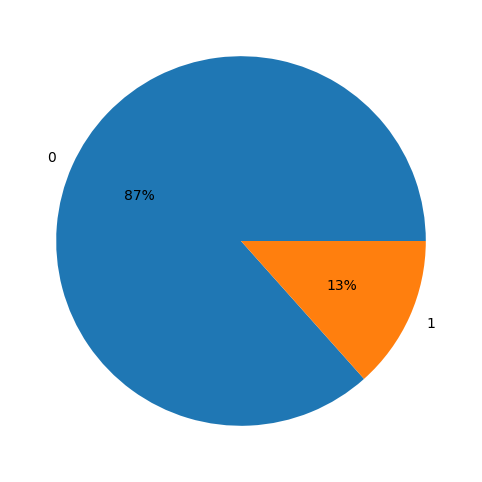

In [ ]:
plt.figure(figsize=(8, 6))
kind_counts = df["label"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

<ipython-input-200-104a7bb0425a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="YlGnBu")


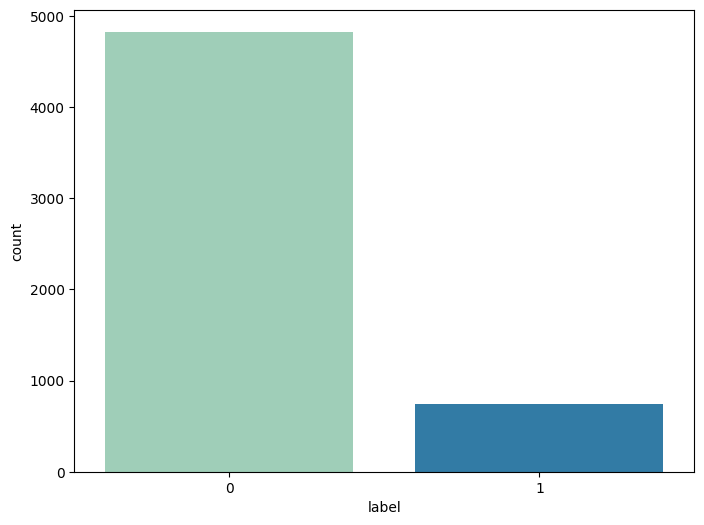

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=df, palette="YlGnBu")
plt.show()

LOGISTIC REGRESSION ALGORITHM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9779


In [ ]:
precision = precision_score(y_test, y_pred)

In [ ]:
print(f"Precision: {precision:.4f}")

Precision: 0.9840


In [ ]:
recall = recall_score(y_test, y_pred)

In [ ]:
print(f"Recall: {recall:.4f}")

Recall: 0.8447


In [ ]:
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9091


NAIVE BAYES ALGORITHM

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
model.score(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9773


SUPPORT VECTOR MACHINE ALGORITHM

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9058


In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9224


In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9140


In [ ]:
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9803
